In [1]:
#imports apis and utils

import urllib, json, os, time
import dateutil.parser
from datetime import datetime, timedelta, timezone

In [2]:
#imports data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#imports viz

import plotly.graph_objects as go
import plotly.express as px
import dash
import dash_core_components as dcc
import dash_html_components as html
import plotly.io as pio

In [4]:
#import data
covid_data_url = 'https://data.ontario.ca/dataset/f4112442-bdc8-45d2-be3c-12efae72fb27/resource/455fd63b-603d-4608-8216-7d8647f43350/download/conposcovidloc.csv'  

covid_data = pd.read_csv(covid_data_url)
refreshtime = datetime.now()
cached=False

In [5]:
#create data frame
covid_df = pd.DataFrame(covid_data)
covid_df.head()

,Row_ID,Accurate_Episode_Date,Case_Reported_Date,Test_Reported_Date,Specimen_Date,Age_Group,Client_Gender,Case_AcquisitionInfo,Outcome1,Outbreak_Related,Reporting_PHU_ID,Reporting_PHU,Reporting_PHU_Address,Reporting_PHU_City,Reporting_PHU_Postal_Code,Reporting_PHU_Website,Reporting_PHU_Latitude,Reporting_PHU_Longitude
0,1,2020-05-15,2020-05-14,2020-05-14,2020-05-12,50s,FEMALE,OB,Resolved,Yes,2253,Peel Public Health,7120 Hurontario Street,Mississauga,L5W 1N4,www.peelregion.ca/health/,43.647471,-79.708893
1,2,2020-03-17,2020-03-24,2020-03-24,2020-03-18,70s,MALE,TRAVEL,Resolved,NaN,2253,Peel Public Health,7120 Hurontario Street,Mississauga,L5W 1N4,www.peelregion.ca/health/,43.647471,-79.708893
2,3,2020-05-15,2020-05-22,2020-05-22,2020-05-21,40s,FEMALE,CC,Resolved,NaN,2253,Peel Public Health,7120 Hurontario Street,Mississauga,L5W 1N4,www.peelregion.ca/health/,43.647471,-79.708893
3,4,2020-05-02,2020-05-07,2020-05-07,2020-05-05,50s,FEMALE,CC,Resolved,NaN,2253,Peel Public Health,7120 Hurontario Street,Mississauga,L5W 1N4,www.peelregion.ca/health/,43.647471,-79.708893
4,5,2020-04-21,2020-05-14,2020-05-13,2020-04-24,60s,FEMALE,OB,Resolved,Yes,2253,Peel Public Health,7120 Hurontario Street,Mississauga,L5W 1N4,www.peelregion.ca/health/,43.647471,-79.708893


In [6]:
#clean data - get info
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275330 entries, 0 to 275329
Data columns (total 18 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Row_ID                     275330 non-null  int64  
 1   Accurate_Episode_Date      275330 non-null  object 
 2   Case_Reported_Date         275330 non-null  object 
 3   Test_Reported_Date         264769 non-null  object 
 4   Specimen_Date              273509 non-null  object 
 5   Age_Group                  275283 non-null  object 
 6   Client_Gender              275330 non-null  object 
 7   Case_AcquisitionInfo       275330 non-null  object 
 8   Outcome1                   275330 non-null  object 
 9   Outbreak_Related           60442 non-null   object 
 10  Reporting_PHU_ID           275330 non-null  int64  
 11  Reporting_PHU              275330 non-null  object 
 12  Reporting_PHU_Address      275330 non-null  object 
 13  Reporting_PHU_City         27

In [7]:
# Filter the dataframe to only contain results in 7 GTA Cities, Accurate Episode Date, Reporting_PHU, Reporting_PHU_Latitude, Reporting_PHU_Longitude
to_drop = ['Test_Reported_Date',
           'Specimen_Date',
           'Age_Group',
           'Client_Gender',
           'Case_AcquisitionInfo',
           'Outcome1',
           'Outbreak_Related',
           'Reporting_PHU_ID',
           'Reporting_PHU',
           'Reporting_PHU_Address',
           'Reporting_PHU_Website']
covid_df.drop(to_drop, inplace=True, axis=1)
covid_df

,Row_ID,Accurate_Episode_Date,Case_Reported_Date,Reporting_PHU_City,Reporting_PHU_Postal_Code,Reporting_PHU_Latitude,Reporting_PHU_Longitude
0,1,2020-05-15,2020-05-14,Mississauga,L5W 1N4,43.647471,-79.708893
1,2,2020-03-17,2020-03-24,Mississauga,L5W 1N4,43.647471,-79.708893
2,3,2020-05-15,2020-05-22,Mississauga,L5W 1N4,43.647471,-79.708893
3,4,2020-05-02,2020-05-07,Mississauga,L5W 1N4,43.647471,-79.708893
4,5,2020-04-21,2020-05-14,Mississauga,L5W 1N4,43.647471,-79.708893
...,...,...,...,...,...,...,...
275325,275326,2021-01-09,2021-01-11,Newmarket,L3Y 6Z1,44.048023,-79.480239
275326,275327,2021-01-04,2021-01-09,Barrie,L4M 6K9,44.410713,-79.686306
275327,275328,2021-01-02,2021-01-08,Toronto,M5B 1W2,43.656591,-79.379358
275328,275329,2020-05-28,2020-05-31,Toronto,M5B 1W2,43.656591,-79.379358


In [8]:
#create a row for cumluative cases (Cases)
covid_df.rename(columns={"Row_ID" : "Case"})

,Case,Accurate_Episode_Date,Case_Reported_Date,Reporting_PHU_City,Reporting_PHU_Postal_Code,Reporting_PHU_Latitude,Reporting_PHU_Longitude
0,1,2020-05-15,2020-05-14,Mississauga,L5W 1N4,43.647471,-79.708893
1,2,2020-03-17,2020-03-24,Mississauga,L5W 1N4,43.647471,-79.708893
2,3,2020-05-15,2020-05-22,Mississauga,L5W 1N4,43.647471,-79.708893
3,4,2020-05-02,2020-05-07,Mississauga,L5W 1N4,43.647471,-79.708893
4,5,2020-04-21,2020-05-14,Mississauga,L5W 1N4,43.647471,-79.708893
...,...,...,...,...,...,...,...
275325,275326,2021-01-09,2021-01-11,Newmarket,L3Y 6Z1,44.048023,-79.480239
275326,275327,2021-01-04,2021-01-09,Barrie,L4M 6K9,44.410713,-79.686306
275327,275328,2021-01-02,2021-01-08,Toronto,M5B 1W2,43.656591,-79.379358
275328,275329,2020-05-28,2020-05-31,Toronto,M5B 1W2,43.656591,-79.379358


In [9]:
#create a column for each case
covid_df['case count'] = 1
covid_df

,Row_ID,Accurate_Episode_Date,Case_Reported_Date,Reporting_PHU_City,Reporting_PHU_Postal_Code,Reporting_PHU_Latitude,Reporting_PHU_Longitude,case count
0,1,2020-05-15,2020-05-14,Mississauga,L5W 1N4,43.647471,-79.708893,1
1,2,2020-03-17,2020-03-24,Mississauga,L5W 1N4,43.647471,-79.708893,1
2,3,2020-05-15,2020-05-22,Mississauga,L5W 1N4,43.647471,-79.708893,1
3,4,2020-05-02,2020-05-07,Mississauga,L5W 1N4,43.647471,-79.708893,1
4,5,2020-04-21,2020-05-14,Mississauga,L5W 1N4,43.647471,-79.708893,1
...,...,...,...,...,...,...,...,...
275325,275326,2021-01-09,2021-01-11,Newmarket,L3Y 6Z1,44.048023,-79.480239,1
275326,275327,2021-01-04,2021-01-09,Barrie,L4M 6K9,44.410713,-79.686306,1
275327,275328,2021-01-02,2021-01-08,Toronto,M5B 1W2,43.656591,-79.379358,1
275328,275329,2020-05-28,2020-05-31,Toronto,M5B 1W2,43.656591,-79.379358,1


In [10]:
#sum of cases by Date
covid_df_sum_by_date = covid_df.groupby(['Accurate_Episode_Date']).sum('case count')
covid_df_sum_by_date

,Row_ID,Reporting_PHU_Latitude,Reporting_PHU_Longitude,case count
Accurate_Episode_Date,,,,
2020-01-01,174044,128.619497,-243.858399,3
2020-01-02,217618,43.656591,-79.379358,1
2020-01-03,223009,43.656591,-79.379358,1
2020-01-05,221790,43.656591,-79.379358,1
2020-01-09,142740,44.048023,-79.480239,1
...,...,...,...,...
2021-01-31,176357396,31118.101912,-56648.675254,711
2021-02-01,276975926,49009.388678,-89043.861752,1120
2021-02-02,217227596,38466.165894,-69810.320297,879


In [11]:
#sum of cases by City
covid_df_sum_by_city = covid_df.groupby(['Reporting_PHU_City']).sum('case count')
covid_df_sum_by_city

,Row_ID,Reporting_PHU_Latitude,Reporting_PHU_Longitude,case count
Reporting_PHU_City,,,,
Barrie,616182485,2.527858e+05,-4.535745e+05,5692
Belleville,34137460,1.599558e+04,-2.801570e+04,362
Brantford,158830779,6.546130e+04,-1.217762e+05,1517
Brockville,58851973,3.649576e+04,-6.192492e+04,818
Chatham,140359856,5.334406e+04,-1.034184e+05,1258
Cornwall,281314139,1.131132e+05,-1.877376e+05,2512
Guelph,499343906,1.904214e+05,-3.510226e+05,4375
Hamilton,1047102367,4.086981e+05,-7.546244e+05,9448
Kenora,26942084,1.328849e+04,-2.522836e+04,267


In [12]:
#sum of cases by City and date
covid_df_sum_by_date_by_city = covid_df.groupby(['Accurate_Episode_Date','Reporting_PHU_City']).sum('case count')
covid_df_sum_by_date_by_city

Row_ID  Reporting_PHU_Latitude  \
Accurate_Episode_Date Reporting_PHU_City                                   
2020-01-01            Simcoe               15353               42.847825   
                      Waterloo             15145               43.462876   
                      Windsor             143546               42.308796   
2020-01-02            Toronto             217618               43.656591   
2020-01-03            Toronto             223009               43.656591   
...                                          ...                     ...   
2021-02-04            Belleville          263847               44.186674   
                      Mississauga         264266               43.647471   
                      Newmarket           243836               44.048023   
                      St. Thomas          526618               85.555607   
                      Toronto             527107               87.313182   

                                          Reporting_PHU_Longitude  case count  
Accurate_Episode_Date Reporting_PHU_City                                       
2020-01-01            Simcoe                           -80.303815           1  
                      Waterloo                         -80.520913           1  
                      Windsor                          -83.033670           1  
2020-01-02            Toronto                          -79.379358           1  
2020-01-03            Toronto                          -79.379358           1  
...                                                           ...         ...  
2021-02-04            Belleville                       -77.391446           1  
                      Mississauga                      -79.708893           1  
                      Newmarket                        -79.480239           1  
                      St. Thomas                      -162.302313           2  
                      Toronto                         -158.758716           2  

[7964 rows x 4 columns]

<AxesSubplot:title={'center':'Case Count by Date - All cases'}, xlabel='Accurate_Episode_Date'>

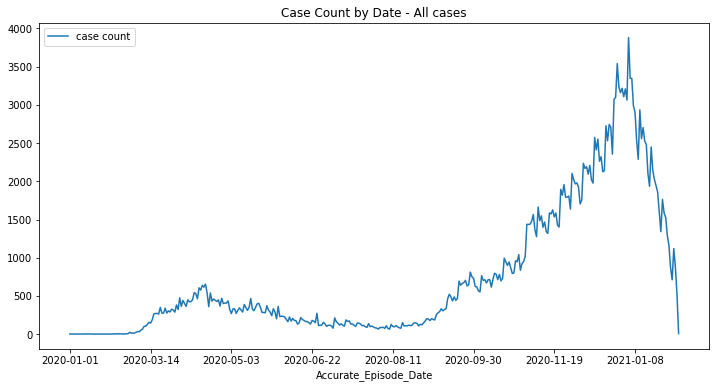

In [13]:
#total cases
covid_df_sum_by_date.plot(y = ['case count'], figsize = (12,6), title = "Case Count by Date - All cases")

<AxesSubplot:title={'center':'Case Count by City - All cases'}, xlabel='Reporting_PHU_City'>

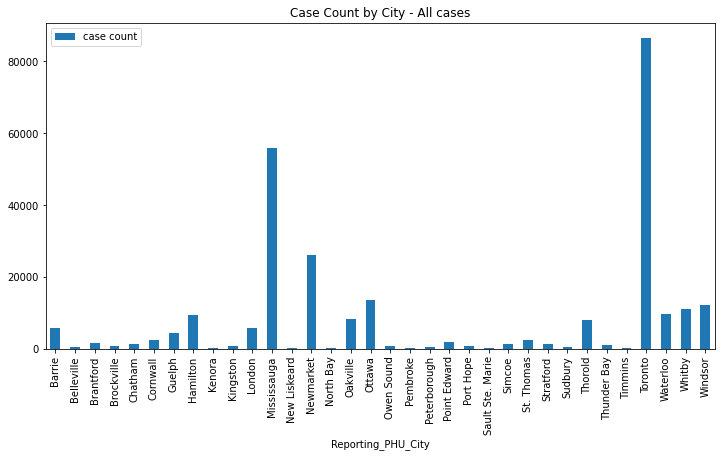

In [14]:
#total by city
covid_df_sum_by_city.plot(kind = 'bar', y = ['case count'], figsize = (12,6), title = "Case Count by City - All cases")

In [15]:
#cases by date toronto
toronto_covid_df = covid_df.loc[covid_df['Reporting_PHU_City'] == 'Toronto']
toronto_covid_df

,Row_ID,Accurate_Episode_Date,Case_Reported_Date,Reporting_PHU_City,Reporting_PHU_Postal_Code,Reporting_PHU_Latitude,Reporting_PHU_Longitude,case count
226,227,2020-04-28,2020-05-03,Toronto,M5B 1W2,43.656591,-79.379358,1
235,236,2020-03-24,2020-03-25,Toronto,M5B 1W2,43.656591,-79.379358,1
312,313,2020-04-10,2020-04-17,Toronto,M5B 1W2,43.656591,-79.379358,1
335,336,2020-04-02,2020-04-06,Toronto,M5B 1W2,43.656591,-79.379358,1
707,708,2020-04-30,2020-04-26,Toronto,M5B 1W2,43.656591,-79.379358,1
...,...,...,...,...,...,...,...,...
275317,275318,2021-01-25,2021-01-28,Toronto,M5B 1W2,43.656591,-79.379358,1
275321,275322,2021-01-02,2021-01-08,Toronto,M5B 1W2,43.656591,-79.379358,1
275327,275328,2021-01-02,2021-01-08,Toronto,M5B 1W2,43.656591,-79.379358,1
275328,275329,2020-05-28,2020-05-31,Toronto,M5B 1W2,43.656591,-79.379358,1


In [16]:
#cases by date Mississauga
Mississauga_covid_df = covid_df.loc[covid_df['Reporting_PHU_City'] == 'Mississauga']
Mississauga_covid_df

,Row_ID,Accurate_Episode_Date,Case_Reported_Date,Reporting_PHU_City,Reporting_PHU_Postal_Code,Reporting_PHU_Latitude,Reporting_PHU_Longitude,case count
0,1,2020-05-15,2020-05-14,Mississauga,L5W 1N4,43.647471,-79.708893,1
1,2,2020-03-17,2020-03-24,Mississauga,L5W 1N4,43.647471,-79.708893,1
2,3,2020-05-15,2020-05-22,Mississauga,L5W 1N4,43.647471,-79.708893,1
3,4,2020-05-02,2020-05-07,Mississauga,L5W 1N4,43.647471,-79.708893,1
4,5,2020-04-21,2020-05-14,Mississauga,L5W 1N4,43.647471,-79.708893,1
...,...,...,...,...,...,...,...,...
275313,275314,2021-01-13,2021-01-29,Mississauga,L5W 1N4,43.647471,-79.708893,1
275315,275316,2021-01-25,2021-01-29,Mississauga,L5W 1N4,43.647471,-79.708893,1
275316,275317,2021-01-19,2021-01-28,Mississauga,L5W 1N4,43.647471,-79.708893,1
275319,275320,2021-01-05,2021-01-10,Mississauga,L5W 1N4,43.647471,-79.708893,1


In [17]:
#cases by date Guelph
Guelph_covid_df = covid_df.loc[covid_df['Reporting_PHU_City'] == 'Guelph']
Guelph_covid_df

,Row_ID,Accurate_Episode_Date,Case_Reported_Date,Reporting_PHU_City,Reporting_PHU_Postal_Code,Reporting_PHU_Latitude,Reporting_PHU_Longitude,case count
195,196,2020-04-30,2020-05-01,Guelph,N1G 0E1,43.524881,-80.233743,1
281,282,2020-05-14,2020-05-16,Guelph,N1G 0E1,43.524881,-80.233743,1
1923,1924,2020-03-28,2020-04-12,Guelph,N1G 0E1,43.524881,-80.233743,1
2529,2530,2020-04-01,2020-04-04,Guelph,N1G 0E1,43.524881,-80.233743,1
3249,3250,2020-05-04,2020-05-15,Guelph,N1G 0E1,43.524881,-80.233743,1
...,...,...,...,...,...,...,...,...
275044,275045,2020-04-02,2020-04-01,Guelph,N1G 0E1,43.524881,-80.233743,1
275057,275058,2020-04-26,2020-04-30,Guelph,N1G 0E1,43.524881,-80.233743,1
275068,275069,2020-11-12,2020-11-16,Guelph,N1G 0E1,43.524881,-80.233743,1
275148,275149,2021-01-20,2021-01-21,Guelph,N1G 0E1,43.524881,-80.233743,1


In [18]:
#cases by date Hamilton
Hamilton_covid_df = covid_df.loc[covid_df['Reporting_PHU_City'] == 'Hamilton']
Hamilton_covid_df

,Row_ID,Accurate_Episode_Date,Case_Reported_Date,Reporting_PHU_City,Reporting_PHU_Postal_Code,Reporting_PHU_Latitude,Reporting_PHU_Longitude,case count
605,606,2020-04-07,2020-04-15,Hamilton,L8P 4S6,43.257631,-79.871341,1
4526,4527,2020-05-25,2020-05-27,Hamilton,L8P 4S6,43.257631,-79.871341,1
8078,8079,2020-07-16,2020-07-19,Hamilton,L8P 4S6,43.257631,-79.871341,1
10216,10217,2020-06-06,2020-06-13,Hamilton,L8P 4S6,43.257631,-79.871341,1
11356,11357,2020-05-02,2020-05-05,Hamilton,L8P 4S6,43.257631,-79.871341,1
...,...,...,...,...,...,...,...,...
275224,275225,2021-01-27,2021-01-27,Hamilton,L8P 4S6,43.257631,-79.871341,1
275225,275226,2021-01-10,2021-01-12,Hamilton,L8P 4S6,43.257631,-79.871341,1
275228,275229,2021-01-11,2021-01-12,Hamilton,L8P 4S6,43.257631,-79.871341,1
275255,275256,2020-12-08,2020-12-12,Hamilton,L8P 4S6,43.257631,-79.871341,1


In [19]:
#cases by date toronto
Oakville_covid_df = covid_df.loc[covid_df['Reporting_PHU_City'] == 'Oakville']
Oakville_covid_df

,Row_ID,Accurate_Episode_Date,Case_Reported_Date,Reporting_PHU_City,Reporting_PHU_Postal_Code,Reporting_PHU_Latitude,Reporting_PHU_Longitude,case count
10,11,2020-05-27,2020-06-02,Oakville,L6M 3Ll,43.413997,-79.744796,1
22,23,2020-05-15,2020-05-17,Oakville,L6M 3Ll,43.413997,-79.744796,1
27,28,2020-05-11,2020-05-15,Oakville,L6M 3Ll,43.413997,-79.744796,1
28,29,2020-03-28,2020-04-03,Oakville,L6M 3Ll,43.413997,-79.744796,1
32,33,2020-05-19,2020-05-22,Oakville,L6M 3Ll,43.413997,-79.744796,1
...,...,...,...,...,...,...,...,...
275152,275153,2021-01-20,2021-01-21,Oakville,L6M 3Ll,43.413997,-79.744796,1
275208,275209,2021-01-09,2021-01-12,Oakville,L6M 3Ll,43.413997,-79.744796,1
275233,275234,2021-01-07,2021-01-08,Oakville,L6M 3Ll,43.413997,-79.744796,1
275258,275259,2020-12-09,2020-12-12,Oakville,L6M 3Ll,43.413997,-79.744796,1


In [20]:
#cases by date toronto
Waterloo_covid_df = covid_df.loc[covid_df['Reporting_PHU_City'] == 'Waterloo']
Waterloo_covid_df

,Row_ID,Accurate_Episode_Date,Case_Reported_Date,Reporting_PHU_City,Reporting_PHU_Postal_Code,Reporting_PHU_Latitude,Reporting_PHU_Longitude,case count
1997,1998,2020-04-01,2020-04-03,Waterloo,N2J 4V3,43.462876,-80.520913,1
3490,3491,2020-04-16,2020-04-28,Waterloo,N2J 4V3,43.462876,-80.520913,1
7377,7378,2020-04-04,2020-04-04,Waterloo,N2J 4V3,43.462876,-80.520913,1
8738,8739,2020-03-26,2020-04-01,Waterloo,N2J 4V3,43.462876,-80.520913,1
8919,8920,2020-04-01,2020-04-06,Waterloo,N2J 4V3,43.462876,-80.520913,1
...,...,...,...,...,...,...,...,...
275016,275017,2020-11-02,2020-11-05,Waterloo,N2J 4V3,43.462876,-80.520913,1
275121,275122,2020-12-26,2020-12-28,Waterloo,N2J 4V3,43.462876,-80.520913,1
275164,275165,2020-12-17,2020-12-20,Waterloo,N2J 4V3,43.462876,-80.520913,1
275280,275281,2021-01-26,2021-01-28,Waterloo,N2J 4V3,43.462876,-80.520913,1


In [21]:
toronto  = covid_df.loc[covid_df['Reporting_PHU_City'] == 'Toronto'].sum()
toronto

Row_ID                                                             18070253214
Accurate_Episode_Date        2020-04-282020-03-242020-04-102020-04-022020-0...
Case_Reported_Date           2020-05-032020-03-252020-04-172020-04-062020-0...
Reporting_PHU_City           TorontoTorontoTorontoTorontoTorontoTorontoToro...
Reporting_PHU_Postal_Code    M5B 1W2M5B 1W2M5B 1W2M5B 1W2M5B 1W2M5B 1W2M5B ...
Reporting_PHU_Latitude                                          3771187.321949
Reporting_PHU_Longitude                                        -6857027.082978
case count                                                               86383
dtype: object

In [22]:
Mississauga  = covid_df.loc[covid_df['Reporting_PHU_City'] == 'Mississauga'].sum()
Mississauga

Row_ID                                                              5551645446
Accurate_Episode_Date        2020-05-152020-03-172020-05-152020-05-022020-0...
Case_Reported_Date           2020-05-142020-03-242020-05-222020-05-072020-0...
Reporting_PHU_City           MississaugaMississaugaMississaugaMississaugaMi...
Reporting_PHU_Postal_Code    L5W 1N4L5W 1N4L5W 1N4L5W 1N4L5W 1N4L5W 1N4L5W ...
Reporting_PHU_Latitude                                          2440941.184981
Reporting_PHU_Longitude                                        -4457640.148909
case count                                                               55924
dtype: object

In [23]:
Hamilton  = covid_df.loc[covid_df['Reporting_PHU_City'] == 'Hamilton'].sum()
Hamilton

Row_ID                                                              1047102367
Accurate_Episode_Date        2020-04-072020-05-252020-07-162020-06-062020-0...
Case_Reported_Date           2020-04-152020-05-272020-07-192020-06-132020-0...
Reporting_PHU_City           HamiltonHamiltonHamiltonHamiltonHamiltonHamilt...
Reporting_PHU_Postal_Code    L8P 4S6L8P 4S6L8P 4S6L8P 4S6L8P 4S6L8P 4S6L8P ...
Reporting_PHU_Latitude                                           408698.098633
Reporting_PHU_Longitude                                         -754624.428729
case count                                                                9448
dtype: object

In [24]:
Guelph  = covid_df.loc[covid_df['Reporting_PHU_City'] == 'Guelph'].sum()
Guelph

Row_ID                                                               499343906
Accurate_Episode_Date        2020-04-302020-05-142020-03-282020-04-012020-0...
Case_Reported_Date           2020-05-012020-05-162020-04-122020-04-042020-0...
Reporting_PHU_City           GuelphGuelphGuelphGuelphGuelphGuelphGuelphGuel...
Reporting_PHU_Postal_Code    N1G 0E1N1G 0E1N1G 0E1N1G 0E1N1G 0E1N1G 0E1N1G ...
Reporting_PHU_Latitude                                           190421.355687
Reporting_PHU_Longitude                                         -351022.626937
case count                                                                4375
dtype: object

In [25]:
Oakville  = covid_df.loc[covid_df['Reporting_PHU_City'] == 'Oakville'].sum()
Oakville

Row_ID                                                               856818082
Accurate_Episode_Date        2020-05-272020-05-152020-05-112020-03-282020-0...
Case_Reported_Date           2020-06-022020-05-172020-05-152020-04-032020-0...
Reporting_PHU_City           OakvilleOakvilleOakvilleOakvilleOakvilleOakvil...
Reporting_PHU_Postal_Code    L6M 3LlL6M 3LlL6M 3LlL6M 3LlL6M 3LlL6M 3LlL6M ...
Reporting_PHU_Latitude                                            363244.91223
Reporting_PHU_Longitude                                         -667224.706542
case count                                                                8367
dtype: object

In [26]:
Waterloo  = covid_df.loc[covid_df['Reporting_PHU_City'] == 'Waterloo'].sum()
Waterloo

Row_ID                                                              1035924777
Accurate_Episode_Date        2020-04-012020-04-162020-04-042020-03-262020-0...
Case_Reported_Date           2020-04-032020-04-282020-04-042020-04-012020-0...
Reporting_PHU_City           WaterlooWaterlooWaterlooWaterlooWaterlooWaterl...
Reporting_PHU_Postal_Code    N2J 4V3N2J 4V3N2J 4V3N2J 4V3N2J 4V3N2J 4V3N2J ...
Reporting_PHU_Latitude                                           418938.659161
Reporting_PHU_Longitude                                         -776141.081853
case count                                                                9639
dtype: object

In [29]:
covid_df_sum_by_date_by_city

Row_ID  Reporting_PHU_Latitude  \
Accurate_Episode_Date Reporting_PHU_City                                   
2020-01-01            Simcoe               15353               42.847825   
                      Waterloo             15145               43.462876   
                      Windsor             143546               42.308796   
2020-01-02            Toronto             217618               43.656591   
2020-01-03            Toronto             223009               43.656591   
...                                          ...                     ...   
2021-02-04            Belleville          263847               44.186674   
                      Mississauga         264266               43.647471   
                      Newmarket           243836               44.048023   
                      St. Thomas          526618               85.555607   
                      Toronto             527107               87.313182   

                                          Reporting_PHU_Longitude  case count  
Accurate_Episode_Date Reporting_PHU_City                                       
2020-01-01            Simcoe                           -80.303815           1  
                      Waterloo                         -80.520913           1  
                      Windsor                          -83.033670           1  
2020-01-02            Toronto                          -79.379358           1  
2020-01-03            Toronto                          -79.379358           1  
...                                                           ...         ...  
2021-02-04            Belleville                       -77.391446           1  
                      Mississauga                      -79.708893           1  
                      Newmarket                        -79.480239           1  
                      St. Thomas                      -162.302313           2  
                      Toronto                         -158.758716           2  

[7964 rows x 4 columns]

In [35]:
covid_city_pivot = pd.pivot_table(covid_df_sum_by_date_by_city, 
                       values='case count', 
                       index=['Accurate_Episode_Date','Reporting_PHU_City' ],
                        dropna = True,
                       aggfunc=np.sum)
covid_city_pivot

case count
Accurate_Episode_Date Reporting_PHU_City            
2020-01-01            Simcoe                       1
                      Waterloo                     1
                      Windsor                      1
2020-01-02            Toronto                      1
2020-01-03            Toronto                      1
...                                              ...
2021-02-04            Belleville                   1
                      Mississauga                  1
                      Newmarket                    1
                      St. Thomas                   2
                      Toronto                      2

[7964 rows x 1 columns]

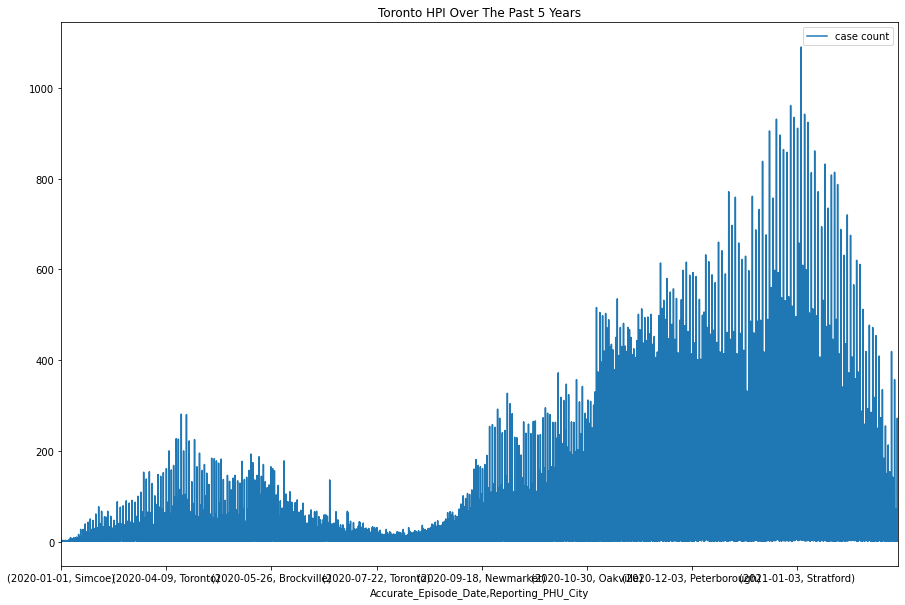

In [39]:
covid_city_pivot.plot(kind="line",title="Toronto HPI Over The Past 5 Years",figsize=(15,10)).margins(x=0)

In [37]:
map_df = px.data.gapminder()
fig = px.bar(covid_city_pivot, y='case count', color='continent', labels={'case count':'Reporting_PHU_City'},
             hover_data=['Reporting_PHU_City'],
             title='Covid by City')
fig.show()

TypeError: Argument 'x' is a pandas MultiIndex. pandas MultiIndex is not supported by plotly express at the moment.

In [ ]:
Covid_cities_df = covid_df.pivot_table(values = 'case count',
                                       index = ['Accurate_Episode_Date','Reporting_PHU_City' ],
                                       columns = 'Reporting_PHU_City',
                                       aggfunc = np.sum,
                          )
Covid_cities_df

In [ ]:
Covid_cities_df.plot()

In [ ]:
#Initial Imports
import geopandas as gpd
import json
import pandas as pd
import numpy as np
import math
import time
import pprint
from datetime import date, datetime, timedelta

#Import Map Tools
from bokeh.io import output_notebook, show
from bokeh.plotting import figure
from bokeh.models import GeoJSONDataSource, LinearColorMapper, ColorBar, NumeralTickFormatter, Label
from bokeh.palettes import brewer
from bokeh.io.doc import curdoc
from bokeh.models import Slider, HoverTool, Select, Button, Text
from bokeh.layouts import widgetbox, row, column

In [ ]:
#SHAPEFILE --> https://www.arcgis.com/home/item.html?id=dcbcdf86939548af81efbd2d732336db
shapefile = 'data/1m_admin_canada/Canada.shp'
sf = gpd.read_file(shapefile)[['NAME', 'geometry']]
sf.columns = ['province', 'geometry'] 
sf.loc[sf['province'] == 'Yukon Territory', 'province'] = 'Yukon' #Replace Yukon Territory by Yukon 

In [ ]:
# select cities
# Filter the dataframe to only contain results in 7 GTA Cities, Accurate Episode Date, Reporting_PHU, Reporting_PHU_Latitude, Reporting_PHU_Longitude
cities_to_drop = ['Barrie',
                  'Belleville',
                  'Brantford',
                  'Brockville',
                  'Chatham',
                  'Cornwall',
                  'Kenora',
                  'Kingston',
                  'London',
                  'New Liskeard',
                  'Newmarket',
                  'North Bay'
                  'Ottawa'
                  'Owen Sound',
                  'Pembroke',
                  'Peterborough',
                  'Point Edward',
                  'Port Hope',
                  'Sault Ste. Marie',
                  'Simcoe',
                  'St. Thomas',
                  'Stratford',
                  'Sudbury',
                  'Thorold',
                  'Thunder Bay',
                  'Timmins',
                  'Whitby',
                  'Windsor']
cities_to_drop

In [ ]:
# select cities
# Filter the dataframe to only contain results in 7 GTA Cities, Accurate Episode Date, Reporting_PHU, Reporting_PHU_Latitude, Reporting_PHU_Longitude
covid_df = covid_df[covid_df.Reporting_PHU_City != cities_to_drop]

In [ ]:
#Plot city series by date
city_line = px.line(data_frame=covid_df,
    x='Accurate_Episode_Date',
    y=To',
    title='Cities by Date',
    width=None,
    height=None,
)

In [ ]:
#Plot city series by date
covid_df.plot(kind = 'line', y = ['case count'], figsize = (15,9), title = "Case Count by City - All cases")
city_line = px.line(covid_df, x="nation", y="count", color="medal", title="Long-Form Input")
fig.show()

In [ ]:
# cases by city
sns.reset_orig()
plt.figure(figsize = (8, 8))
plt.plot(dfn.Long, dfn.Temp_Jan)
plt.plot(dfn.Long, dfn.Temp_Jul)
plt.xlabel('Longitude')
plt.ylabel('Temperature (Celsius)')
plt.legend(['Temperature January','Temperature July'], bbox_to_anchor=(0., 1.02, 1., .102), loc=3, mode="expand", borderaxespad=0)
plt.show()

In [ ]:
# cases by city
covid_df.loc[covid_df['Reporting_PHU_City'] == [cities]

In [ ]:
df_ca.index = df_ca['Province/State']
df_ca = df_ca.drop(['Diamond Princess','Grand Princess','Repatriated Travellers'],axis=0)
ax = df_ca.transpose().iloc[4:].plot(figsize=(14, 7),
                                     title = 'Cumulative cases of COVID-19 in provinces of Canada')
ax.set_xlabel("Date")
ax.set_ylabel("Number of cases")